# Genetic Mutations Data

### Step 1: Importing packages and setting up your notebook. 

<b>We start the notebook by importing the standard packages for data science. These are useful for playing data in dataframes and for plotting the results.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Our cancer data and a variety of accessory functions are provided in the CPTAC package.</b>

In [2]:
from PayneLabData import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


### Step 2: Getting data and finding your gene of interest

<b>To begin, we first have to grab the data. We retrieve protein abudance and somatic gene mutations using <code>CPTAC.get_somatic()</code> and <code>CPTAC.get_proteomics()</code> functions. This puts the data into a dataframe for us.</b>

In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()

<b>Next, pick a gene of interest to see how mutation affects the protein abundance. For this example, we will look at PTEN with the highest number of mutations within our cohort.</b>

In [4]:
gene = somatic_mutations["Gene"].value_counts().index[0]

### Step 3: Merging dataframes

The data for PTEN currently exists in two different dataframes, one for proteomics and one for the mutations. To make things easy for you, we have created a variety of functions to merge data across the dataframes. Here we want to merge mutation data with molecular measurements. This uses the <code>CPTAC.compare_mutations()</code> function. You need to specify as parameters the molecular dataframe (here 'proteomics') and the specific gene name. This creates a dataframe with two columns, one for the proteomics data and one for the mutations. You can see the contents of the dataframe with <code>cross.head()</code> 

In [5]:
cross = CPTAC.compare_mutations(proteomics, gene)

### Step 4: Plot data

<b>Our goal is to visually inspect how the protein abundance changes for patients with a mutation compared to the normal (wild-type) gene sequence. We will use the Seaborn graphics and plotting package, which makes creating figures easy.</b> 

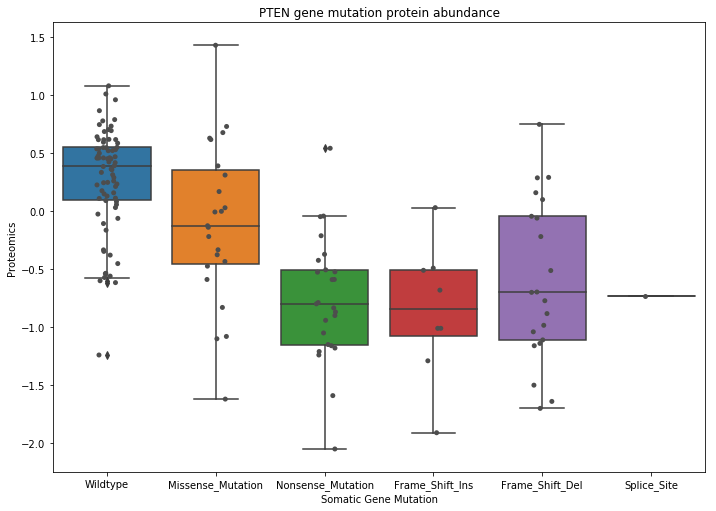

In [10]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims) #bigger plot displays Somatic Gene Mutation category without overlapping labels
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=gene, ax = ax, order = ["Wildtype","Missense_Mutation","Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]) #order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=gene,jitter=True, color=".3", order = ["Wildtype","Missense_Mutation","Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"])
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

## Step 5: Try it again

Let's try this again with a different gene. Beta-catenin (CTNNB1) is also frequently mutated in our cohort and well known as a oncogene. In the following two cells we will again make a merged dataframe (cross2) and then plot it out.

In [7]:
gene2 = 'CTNNB1'
cross2 = CPTAC.compare_mutations(proteomics, gene2)

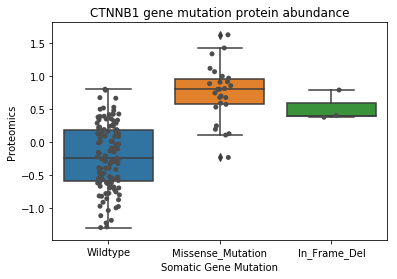

In [8]:
boxplot2 = sns.boxplot(data=cross2, x="Mutation",y=gene2)
boxplot2.set_title("CTNNB1 gene mutation protein abundance")
boxplot2 = sns.stripplot(data=cross2, x="Mutation",y=gene2,jitter=True, color=".3")
boxplot2.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()